## Datensatz verkleinern

### 100 Songs pro Band

In [14]:
import pandas as pd 
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [ ]:
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")
c = Counter(df.artist)
for v, k in c.items():
    if k<=99:
        df = df[df.artist!=v]

In [ ]:
g = df.groupby('artist')
df2 = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())))

In [ ]:
df2 = df2.rename(columns={'artist': 'artists'})

In [ ]:
df2

In [ ]:
df2.to_csv("songs_100.csv")

### 25 Songs pro Band

In [ ]:
df = pd.read_csv("songs_100.csv")

In [ ]:
g = df.groupby('artists')
df3 = pd.DataFrame(g.apply(lambda group: group.iloc[75:, 75:]))

In [ ]:
df3.to_csv("songs_25.csv")
df3 = pd.read_csv("songs_25.csv")

In [ ]:
df3.set_index('Unnamed: 1', inplace = True)
df3['check'] = 'True'

In [ ]:
frames = [df, df3]
result = pd.concat(frames, axis=1)

In [ ]:
#alle rows, die NAN in der Spalte check sind, löschen
result.dropna(subset = ["check"], inplace=True)

In [ ]:
result.to_csv("songs_25.csv")

In [3]:
df = pd.read_csv("../songs_25.csv")

In [5]:
df

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True
...,...,...,...,...,...,...,...,...
6795,6795,ZZ Top,36-22-36,what what what you want? hey my thing is a ...,646,Rock,Pop,True
6796,6796,ZZ Top,Deal Goin' Down,when the deal goin' down and you gonna take yo...,746,Rock,Pop,True
6797,6797,ZZ Top,Can't Stop Rockin',i heard about the rock for sometime i know. ...,995,Rock,Pop,True
6798,6798,ZZ Top,I Got The Message,i'm picking up on a signal that's in the air ...,495,Rock,Pop,True


In [4]:
artists = list(np.unique(df.artists))
len(artists)

272

In [7]:
len(df)

6800

In [8]:
mean ={}
for a in artists:
    mean[a] = int(np.mean(df.number_of_tokens[df.artists==a]))

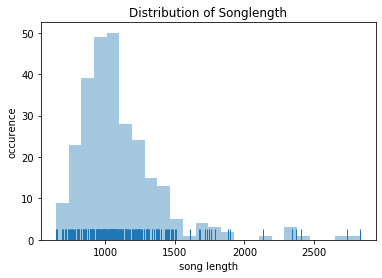

In [11]:
ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Distribution of Songlength")
plt.savefig("songlength_dist")
plt.show()

In [16]:
c = Counter(df.Genre1)

In [20]:
d = Counter(df.Genre2)

In [21]:
d

Counter({' Rock': 1500,
         ' Pop': 3400,
         ' Folk, World, & Country': 200,
         ' Electronic': 1025,
         ' Blues': 200,
         ' Stage & Screen': 25,
         ' Jazz': 150,
         ' Funk / Soul': 150,
         ' Hip Hop': 125,
         ' Latin': 25})

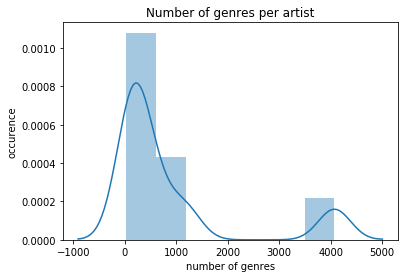

In [22]:
ax = sns.distplot(list(c.values()))
ax.set_xlabel("number of genres")
ax.set_ylabel("occurence")
plt.title("Number of genres per artist")
plt.savefig("songs_per_artist")

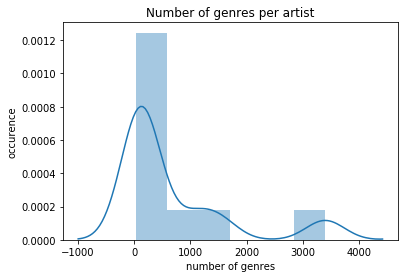

In [23]:
ax = sns.distplot(list(d.values()))
ax.set_xlabel("number of genres")
ax.set_ylabel("occurence")
plt.title("Number of genres per artist")
plt.savefig("songs_per_artist")

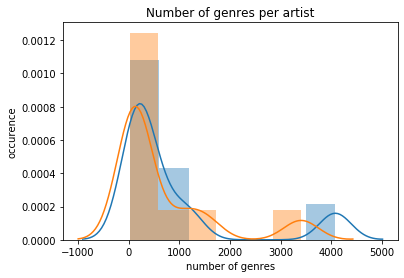

In [26]:
ax = sns.distplot((list(c.values())))
ax = sns.distplot(list(d.values()));
ax.set_xlabel("number of genres")
ax.set_ylabel("occurence")
plt.title("Number of genres per artist")
plt.savefig("songs_per_artist")

([<matplotlib.patches.Wedge at 0x2a907d09508>,
 [Text(0.941864623407519, 0.5682350140332895, 'Pop'),
  Text(-1.0835327553869374, 0.18962269907263624, 'Rock'),
  Text(0.4674372142676011, -0.9957421607613816, 'Folk, World, & Country'),
  Text(0.8462672737434997, -0.7027315998236771, 'Electronic'),
  Text(0.9957420349380324, -0.4674374822983995, 'Jazz'),
  Text(1.070781829368813, -0.25184573431682006, 'Funk / Soul'),
  Text(1.0964067669061075, -0.08883806325273315, 'Hip Hop'),
  Text(1.099926628314955, -0.012704814980753036, 'Reggae')])

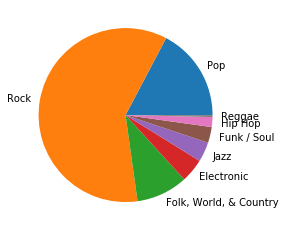

In [45]:
counts = Counter(df.Genre1)
plt.pie([float(v) for v in counts.values()], labels=[str(k) for k in counts],
           autopct=None)

([<matplotlib.patches.Wedge at 0x2a90737dd88>,
 [Text(0.8462673642109039, 0.7027314908779381, ' Rock'),
  Text(-1.0812704118786753, 0.20212445768812842, ' Pop'),
  Text(-0.10149518296789213, -1.095307595077435, ' Folk, World, & Country'),
  Text(0.5016522528765798, -0.9789509779268073, ' Electronic'),
  Text(0.9483647438286531, -0.557318860853294, ' Blues'),
  Text(1.001074437048179, -0.45590566073330535, ' Stage & Screen'),
  Text(1.034624104627729, -0.373567881546675, ' Jazz'),
  Text(1.0763132828813349, -0.22704562777821524, ' Funk / Soul'),
  Text(1.0964067763933862, -0.08883794616414312, ' Hip Hop'),
  Text(1.0999266296717343, -0.012704697516266811, ' Latin')])

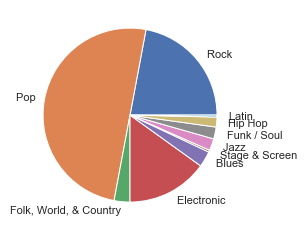

In [51]:
counts = Counter(df.Genre2)
plt.pie([float(v) for v in counts.values()], labels=[str(k) for k in counts],
           autopct=None)

artists
ABBA                    AxesSubplot(0.125,0.125;0.775x0.755)
Aerosmith               AxesSubplot(0.125,0.125;0.775x0.755)
Air Supply              AxesSubplot(0.125,0.125;0.775x0.755)
Alabama                 AxesSubplot(0.125,0.125;0.775x0.755)
Alan Parsons Project    AxesSubplot(0.125,0.125;0.775x0.755)
                                        ...                 
Wishbone Ash            AxesSubplot(0.125,0.125;0.775x0.755)
XTC                     AxesSubplot(0.125,0.125;0.775x0.755)
Yes                     AxesSubplot(0.125,0.125;0.775x0.755)
Yngwie Malmsteen        AxesSubplot(0.125,0.125;0.775x0.755)
ZZ Top                  AxesSubplot(0.125,0.125;0.775x0.755)
Name: number_of_tokens, Length: 272, dtype: object

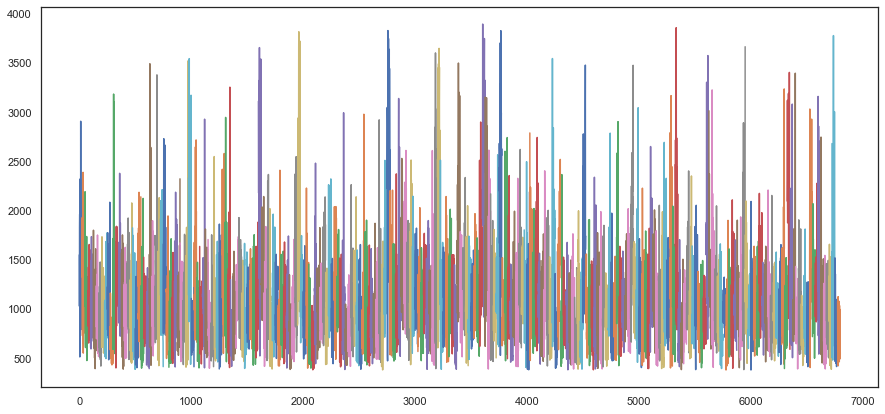

In [56]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('artists')['number_of_tokens'].plot(ax=ax)